In [9]:
import numpy as np
from matplotlib import pyplot as plt
from tifffile import imread
from skimage.filters import threshold_multiotsu
import os
import porespy as ps
from tifffile import imwrite
from hydra.experimental import compose, initialize
from omegaconf import OmegaConf

def clean_img(img_t):
    '''
    2  3^3 median image filter
    3 Otsu binary segmentation
    https://homepages.inf.ed.ac.uk/rbf/HIPR2/median.htm
    https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_multiotsu.html
    '''

    thresholds = threshold_multiotsu(img_t,classes=2)
    # from the threshold we separate regions
    img_t = np.digitize(img_t, bins=thresholds)

    return img_t


def img_crop(img,crop_size):
    x_max = img.shape[0]
    y_max = img.shape[1]
    z_max = img.shape[2]

    sec = img[
        crop_size:x_max-crop_size,
        crop_size:y_max-crop_size,
        crop_size:z_max-crop_size
        ]
    return sec


def np_to_tif(img,f_name):
    '''
    convert numpy to tif
    '''

    img_save = (img * 255).astype('uint8')
    # Save the 3D array as a 3D tif
    imwrite(f_name, img_save)

def tif_to_np(f_name):
    '''
    convert tif to numpy
    '''
    img = imread(f_name)
    img = img.astype('float32')/255
    return img>0.5



initialize(config_path=f"../config/ex6")
cfg = compose(config_name="dataset")

img_list = []
for i in [1]:
    img_list.append(
        tif_to_np(
            os.path.join(
                cfg.PATH.main_vol,
                f'main_{i}.tif'
                )
                  )
        )


/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/hydra/experimental/initialize.py:43: UserWarning: hydra.experimental.initialize() is no longer experimental. Use hydra.initialize()
  deprecation_warning(message=message)
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/hydra/experimental/initialize.py:45: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  self.delegate = real_initialize(


ValueError: GlobalHydra is already initialized, call GlobalHydra.instance().clear() if you want to re-initialize

In [4]:
img = img_list[0]
print(img.shape)
print('Porosity of image is {}'.format(ps.metrics.porosity(img)))

(636, 656, 636)
Porosity of image is 0.1994853984506826


In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
from scipy import ndimage


def plot_3D(img): 
    # Generating a 3D sine wave
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(projection='3d')

    # Set black and white colors based on boolean_data
    # colors = np.empty(img.shape + (4,), dtype=np.float32)
    colors = np.empty(img.shape, dtype=object)

    colors[img] = 'white'  # White for True values
    colors[~img] = 'black'  # Black for False values

    plt.axis('off')
    filled = np.ones((img.shape[0], img.shape[1], img.shape[2]), dtype=np.bool)

    # Display the boolean_data using voxels
    ax.voxels(filled, facecolors=colors,edgecolors=colors)

    # Show the plot
    plt.show()


In [11]:
img_128 = img[:128,:128,:128]
print(f'shape of image is {img_128.shape}')

img_64_list = []

for i,j,k in [(0,0,0),(0,0,1),(1,1,1)]:

    img_64 = img_128[
                    i*64:(i+1)*64,
                    j*64:(j+1)*64,
                    k*64:(k+1)*64
                    ]
    
    print(img_64.shape)

    img_64_list.append(img_64)

shape of image is (128, 128, 128)
(64, 64, 64)
(64, 64, 64)
(64, 64, 64)


/tmp/ipykernel_1159495/262957463.py:21: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  filled = np.ones((img.shape[0], img.shape[1], img.shape[2]), dtype=np.bool)


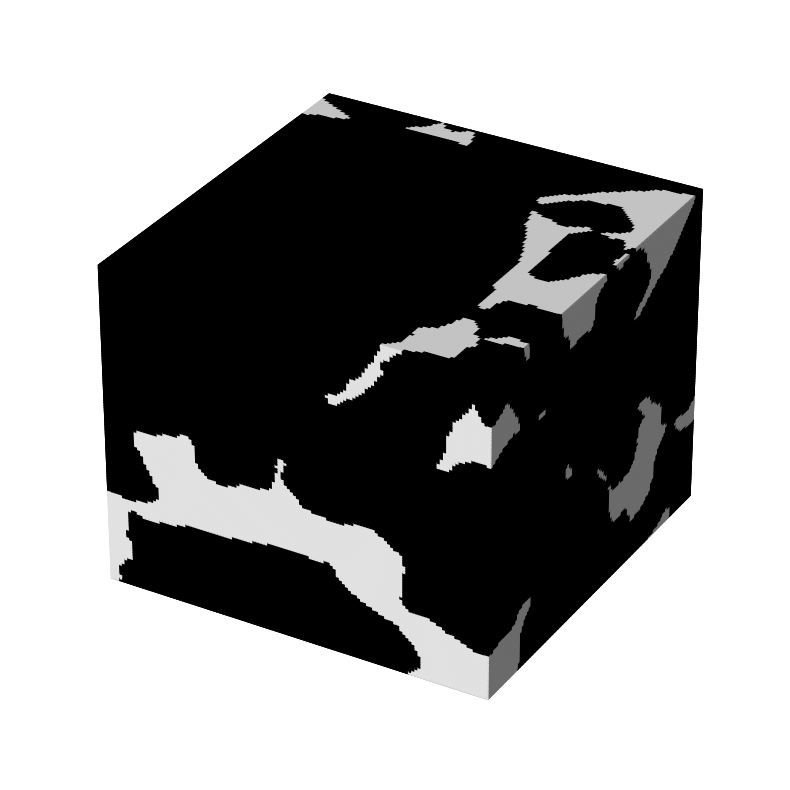

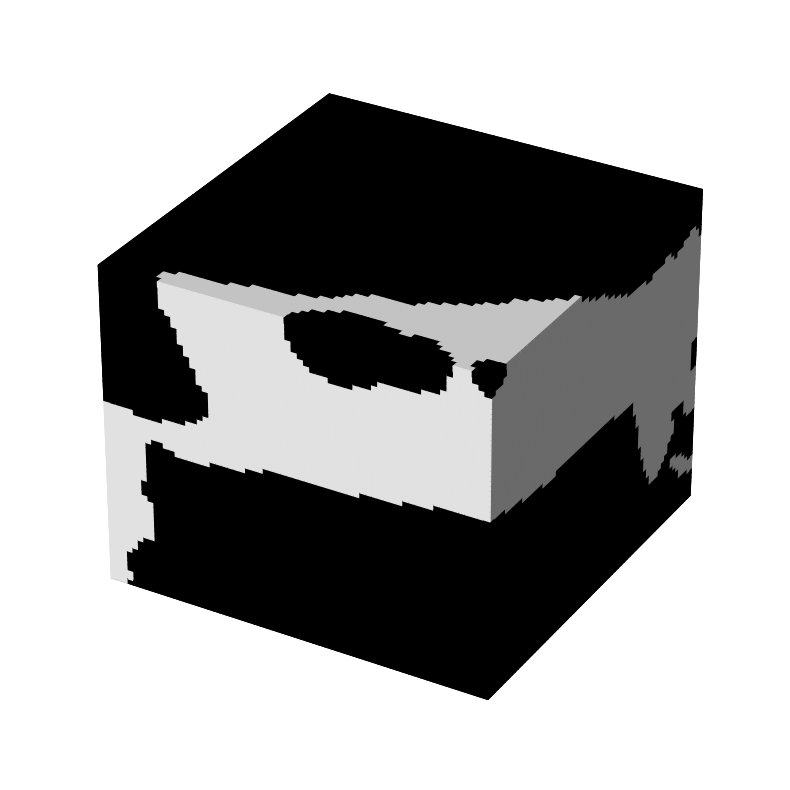

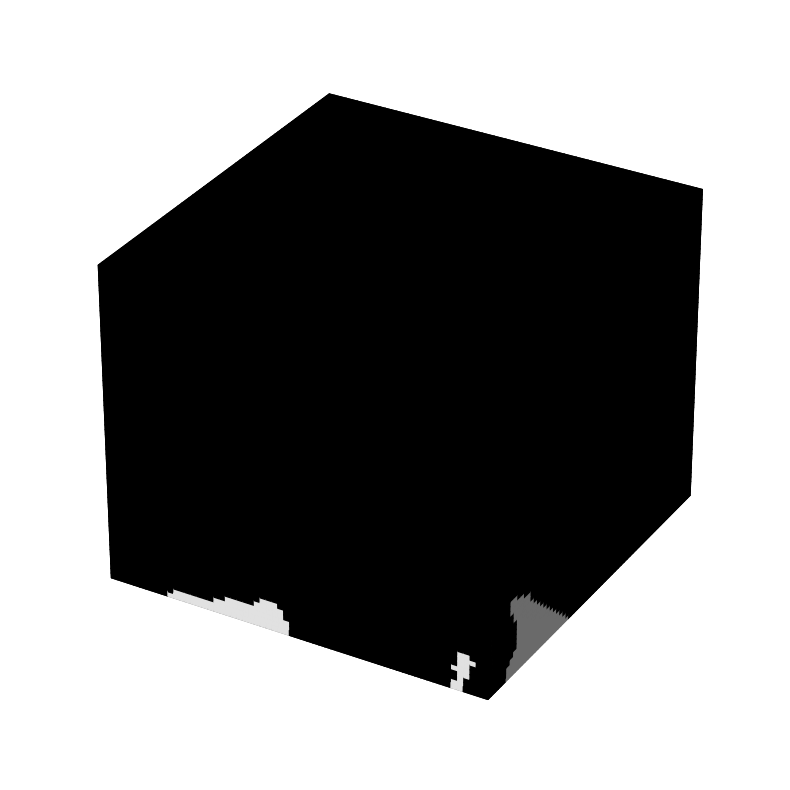

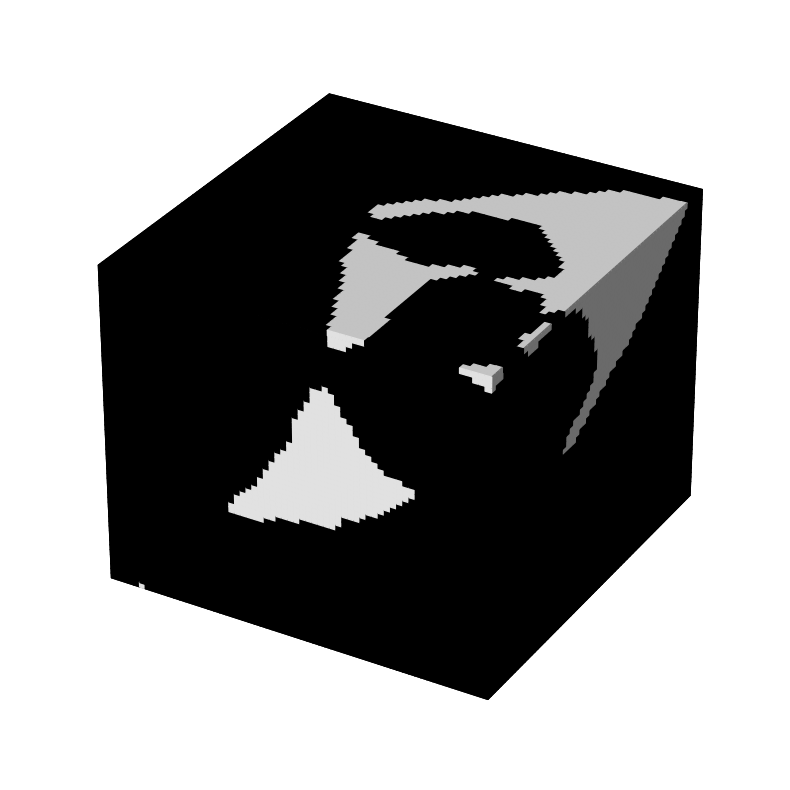

In [12]:
plot_3D(img_128)
for img_tmp in img_64_list:
    plot_3D(img_tmp)
